# Test ios features vs. py

In [ ]:
from notebooks import *
sg.init(None)
figsize(aspect=1/12)
def sigp(x):
    pp((x.shape, x[:7]))
def sig(x):
    sigp(x)
    plt.plot(x); plt.show()
def mat(X, rows=10, cols=10, **show_img_kwargs):
    pp(X.shape)
    pp(X[:rows, :cols])
    show_img(X, **show_img_kwargs)
def mat_flip(*args, **kwargs):
    mat(*args, **{
        'origin': 'lower',
        **kwargs,
    })

INFO     [16:37:02.960] [97915] 151 logging_/<module>: {logging_yaml: None}

INFO     [16:37:03.412] [97915]  32 api.server_globals/init

DEBUG    [16:37:03.420] [97915]  75 api.server_globals/load: load_search...

INFO     [16:37:03.817] [97915]  79 api.server_globals/load: load_search (took 0.388s)

DEBUG    [16:37:03.826] [97915]  75 api.server_globals/load: load_xc_meta...

INFO     [16:37:04.294] [97915]  79 api.server_globals/load: load_xc_meta (took 0.462s)

DEBUG    [16:37:04.302] [97915]  75 api.server_globals/load: load_feat_info...

INFO     [16:37:04.311] [97915] 110 api.server_globals/load_feat_info

INFO     [16:37:04.318] [97915]  79 api.server_globals/load: load_feat_info (took 0.008s)

DEBUG    [16:37:04.325] [97915]  75 api.server_globals/load: load_search_recs...

INFO     [16:37:04.332] [97915] 118 api.server_globals/load_search_recs

INFO     [16:37:04.339] [97915] 601 api.recs/get_search_recs

INFO     [16:37:04.360] [97915] 151 payloads/df_cache_hybrid: Hit: payloads/search_recs-version[8],limit[3500],audio_s[10],countries_k[na],com_names_k[ca],num_recs[None]-064a482

DEBUG    [16:37:04.374] [97915] 152 payloads/df_cache_hybrid: Hit ...

DEBUG    [16:37:04.388] [97915] 161 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (5.1 MB) ...

INFO     [16:37:05.862] [97915] 168 payloads/df_cache_hybrid: Hit: Read api/lite.parquet (5.1 MB) [1.474s]

DEBUG    [16:37:05.881] [97915] 173 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (142.0 MB) ...

INFO     [16:37:06.288] [97915] 180 payloads/df_cache_hybrid: Hit: Read api/bytes-audio_bytes.parquet (142.0 MB) [0.407s]

DEBUG    [16:37:06.302] [97915] 173 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (38.5 MB) ...

INFO     [16:37:06.406] [97915] 180 payloads/df_cache_hybrid: Hit: Read api/bytes-spectro_bytes.parquet (38.5 MB) [0.104s]

DEBUG    [16:37:06.420] [97915] 185 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (4.6 MB) ...

INFO     [16:37:06.432] [97915] 187 payloads/df_cache_hybrid: Hit: Read api/feat-f_preds.npy (4.6 MB) [float32, 0.012s]

DEBUG    [16:37:06.443] [97915] 185 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (21.0 MB) ...

INFO     [16:37:06.471] [97915] 187 payloads/df_cache_hybrid: Hit: Read api/feat-feat.npy (21.0 MB) [float32, 0.028s]

INFO     [16:37:06.479] [97915] 190 payloads/df_cache_hybrid: Hit: Join lite + bytes + feats

INFO     [16:37:06.528] [97915] 201 payloads/df_cache_hybrid: Hit [2.154s]

,dir,file,size,frac
5,api,TOTAL,211258662,1.000
1,api,api/bytes-audio_bytes.parquet,142018687,0.672
2,api,api/bytes-spectro_bytes.parquet,38468688,0.182
4,api,api/feat-feat.npy: float32,21000128,0.099
0,api,api/lite.parquet,5137031,0.024
3,api,api/feat-f_preds.npy: float32,4634128,0.022


INFO     [16:37:06.573] [97915]  79 api.server_globals/load: load_search_recs (took 2.241s)

INFO     [16:37:06.581] [97915]  34 api.server_globals/init: done

# SpectroLike

(

4

,

5

)

array([[0.222, 0.622, 0.863, 0.6  , 0.229],
       [0.986, 0.885, 0.048, 0.067, 0.42 ],
       [0.667, 0.697, 0.403, 0.596, 0.999],
       [0.032, 0.195, 0.814, 0.82 , 0.073]])

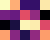

(

4

,

5

)

array([[0.365, 1.026, 1.423, 0.989, 0.378],
       [1.626, 1.459, 0.08 , 0.111, 0.692],
       [1.099, 1.149, 0.665, 0.983, 1.647],
       [0.052, 0.322, 1.342, 1.352, 0.121]])

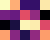

In [ ]:
with test_for_swift('SpectroLike.norm_rms') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = spectro.norm_rms().S
    mat_flip(X, scale=10)
    mat_flip(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())

(

4

,

5

)

array([[0.81 , 0.34 , 0.408, 0.699, 0.12 ],
       [0.432, 0.062, 0.047, 0.733, 0.991],
       [0.338, 0.001, 0.623, 0.801, 0.264],
       [0.119, 0.503, 0.694, 0.229, 0.163]])

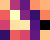

(

4

,

5

)

array([[0.402, 0.   , 0.   , 0.291, 0.   ],
       [0.   , 0.   , 0.   , 0.301, 0.559],
       [0.   , 0.   , 0.285, 0.463, 0.   ],
       [0.   , 0.274, 0.465, 0.   , 0.   ]])

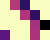

In [ ]:
with test_for_swift('SpectroLike.clip_below_median_per_freq') as (name, Dump):
    spectro = SpectroLike()  # Mock
    spectro.S = np.random.rand(4,5); spectro.S
    X = spectro.S
    Y = spectro.clip_below_median_per_freq().S
    mat_flip(X, scale=10)
    mat_flip(Y, scale=10)
    raise Dump(X=X.tolist(), Y=Y.tolist())